In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

para carregar as imagens iremos utilizar uma biblioteca para fazer isso,
pois como uma imagem é compactada, se abrirmos a imagem de forma binaria, os bytes(matriz) nao estaria organizada de forma que precisamos

no nosso exemplo = 64 * 64 * 3 = 4096 * 3 = 12288

12288 * 1byte (0-255 - equivale a 1byte)

In [3]:
gatos = '../inputs/data/train/cat/*.png'
nao_gatos = '../inputs/data/train/noncat/*.png'

In [4]:
# img = cv2.imread('/Users/mustafa/test.jpg')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# plt.imshow(gray)
# plt.title('my picture')
# plt.show()

In [12]:
img = cv2.imread(glob.glob(gatos)[0])

In [16]:
img.shape

(64, 64, 3)

In [33]:
img #somente uma imagem
#r = 5
#g = 8
#b = 3

array([[[ 5,  8,  3],
        [ 4,  8,  3],
        [ 6, 10,  5],
        ...,
        [ 4, 25, 58],
        [ 4, 22, 51],
        [ 3, 22, 53]],

       [[ 4,  7,  3],
        [ 4,  8,  4],
        [ 6, 10,  6],
        ...,
        [ 4, 24, 59],
        [ 3, 22, 53],
        [ 4, 22, 53]],

       [[ 4,  7,  3],
        [ 5,  9,  5],
        [ 7, 10,  6],
        ...,
        [ 3, 24, 58],
        [ 3, 22, 54],
        [ 4, 22, 55]],

       ...,

       [[ 7,  5,  4],
        [ 6,  5,  4],
        [ 6,  4,  3],
        ...,
        [47, 48, 53],
        [46, 46, 51],
        [44, 45, 47]],

       [[ 7,  5,  4],
        [ 7,  5,  4],
        [ 6,  4,  3],
        ...,
        [42, 43, 46],
        [43, 44, 47],
        [42, 43, 47]],

       [[ 6,  4,  3],
        [ 6,  4,  3],
        [ 6,  4,  3],
        ...,
        [38, 40, 44],
        [39, 39, 44],
        [39, 42, 44]]], dtype=uint8)

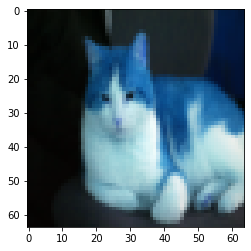

In [13]:
plt.imshow(img)

se eu passar -1 no reshape ele ja pega o tamanho 64 * 64 * 3, ele entende a dimensao

$\theta_0$ é sempre 1

In [50]:
X = []
Y = []

for gato in glob.glob(gatos):
    imagem = cv2.imread(gato) #cv2.imread() retorna a matriz do formato que queremos
    imagem = imagem.reshape(64*64*3) #se eu passar (1,(64*64*3)), ele ira assumir uma tripla
    X.append(imagem)
    Y.append(1) #adiciona uma imagem e um "1" relacionado a esse gato, 1 quando é gato e 0 quando nao e gato
    
for nao_gato in glob.glob(nao_gatos):
    imagem = cv2.imread(nao_gato) #cv2.imread() retorna a matriz do formato que queremos
    imagem = imagem.reshape(-1) #se eu passar (1,(64*64*3)), ele ira assumir uma tripla
    X.append(imagem)
    Y.append(0) #adiciona uma imagem e um "0" relacionado a esse NAO gato

In [51]:
X = np.array(X)

In [52]:
#OS Primeios 4096 sao os vermelhos e asism em seguida
X

array([[  5,   8,   3, ...,  39,  42,  44],
       [ 11,  16,  23, ...,  32,  41,  54],
       [ 65, 104, 122, ..., 128, 124, 146],
       ...,
       [ 58,  82,  62, ...,  82,  91,  54],
       [207, 187, 166, ..., 202, 184, 162],
       [105, 129, 135, ..., 117, 132, 153]], dtype=uint8)

m é a qtd de linhas, e 12288 sera a qtd de colunas, q é x1,x2,...,xn

In [53]:
X.shape

(209, 12288)

In [54]:
Y = np.array(Y)
Y.shape

(209,)

In [55]:
Y = np.expand_dims(Y, axis=1)

In [56]:
Y.shape

(209, 1)

In [57]:
X = np.insert(X, 0, 1, axis=1)

In [58]:
X.shape

(209, 12289)

In [59]:
X

array([[  1,   5,   8, ...,  39,  42,  44],
       [  1,  11,  16, ...,  32,  41,  54],
       [  1,  65, 104, ..., 128, 124, 146],
       ...,
       [  1,  58,  82, ...,  82,  91,  54],
       [  1, 207, 187, ..., 202, 184, 162],
       [  1, 105, 129, ..., 117, 132, 153]], dtype=uint8)

In [82]:
X[0][-3:-1]

array([39, 42], dtype=uint8)